In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Kernel and libraries loaded successfully.")


Kernel and libraries loaded successfully.


In [4]:
import os
os.listdir(".")

['.git',
 '.gitignore',
 '.venv',
 'bank-full.csv',
 'bank-names.txt',
 'bank.csv',
 'bank_marketing_eda.ipynb',
 'README.md']

In [5]:
df = pd.read_csv("bank.csv", sep=";")

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Loads the dataset and shows the first rows to get a quick initial overview.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Displays a summary of the dataset, including column types and missing values.

In [10]:
df["y"].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

In [11]:
df["y"].value_counts(normalize=True)

y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64

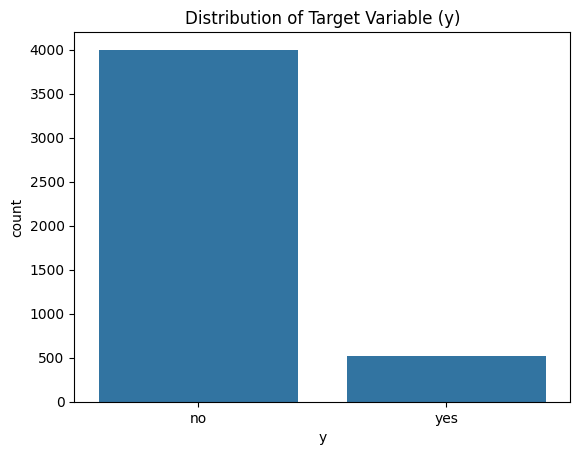

In [12]:
sns.countplot(data=df, x="y")
plt.title("Distribution of Target Variable (y)")
plt.show()

Plots the class distribution of the target variable to check for imbalance -> strong imbalance

In [13]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Shows summary statistics for numerical features to understand their distribution.

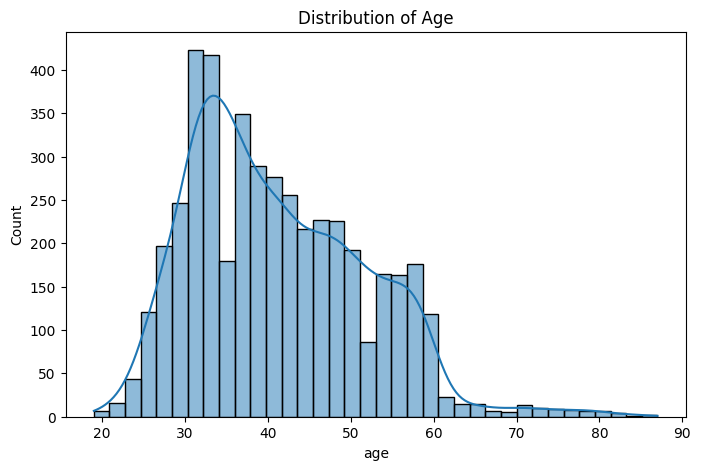

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")
plt.xlabel("age")
plt.show()

Most customers are between 30 and 50 years old.

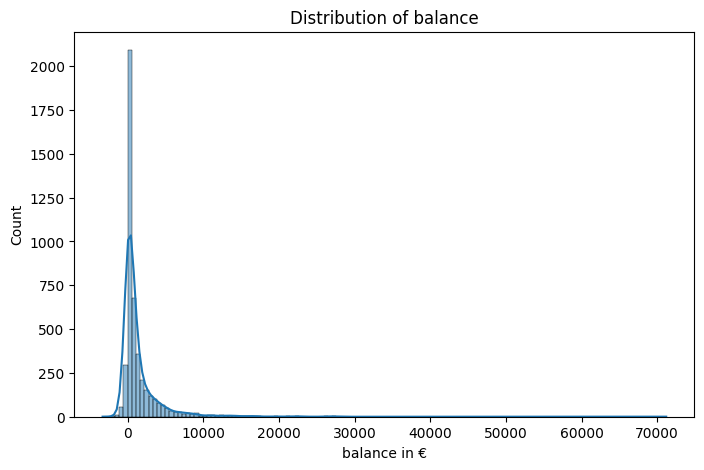

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df["balance"], kde=True)
plt.title("Distribution of balance")
plt.xlabel("balance in €")
plt.show()

Most customers have virtually no significant credit balance.
Only a few have a high balance up to 70.000. 
There is also negative values -> debt.

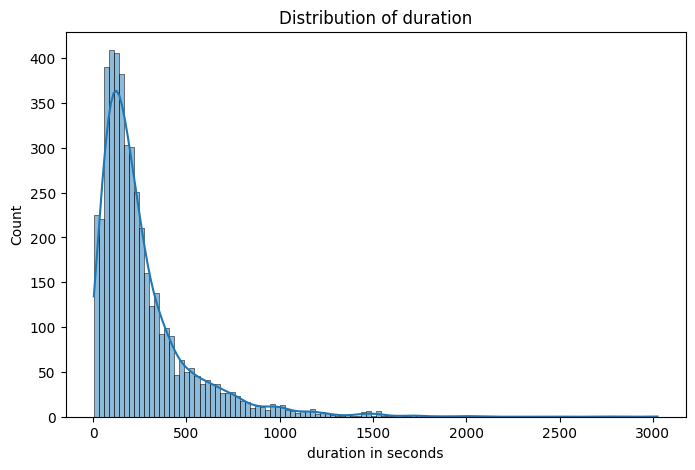

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df["duration"], kde=True)
plt.title("Distribution of duration")
plt.xlabel("duration in seconds")
plt.show()

Most of the calls are extremly short, only a small group engages in lengthy conversations. Outliers in ranges up to 3000 seconds = 50 minutes -> high indicator for probability of closing.

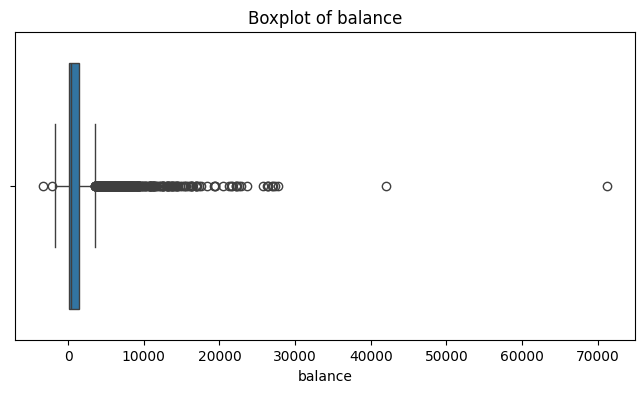

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["balance"])
plt.title("Boxplot of balance")
plt.show()

The majority of customers have extremely low account balances.
A few very wealthy customers are massively distorting the distribution.

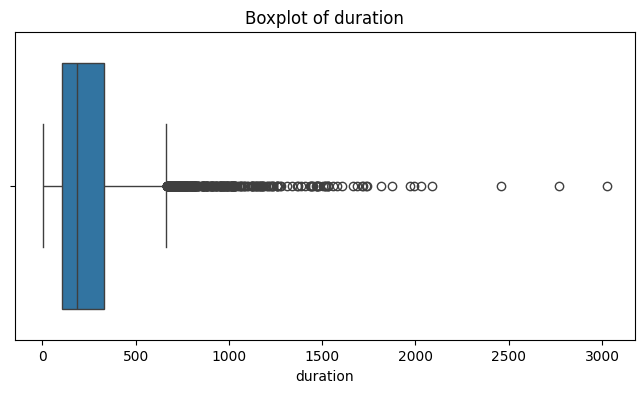

In [28]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["duration"])
plt.title("Boxplot of duration")
plt.show()

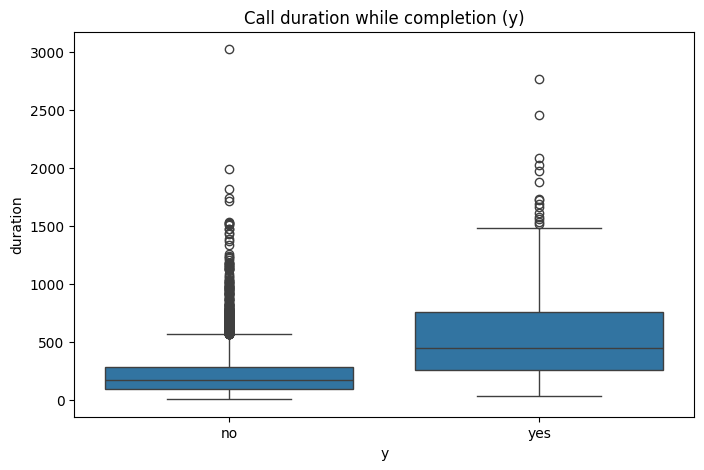

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="y", y="duration")
plt.title("Call duration while completion (y)")
plt.show()

Customers who are interested talk to the consultant for significantly longer. Conversations can last 15–40 minutes as the completion approaches.


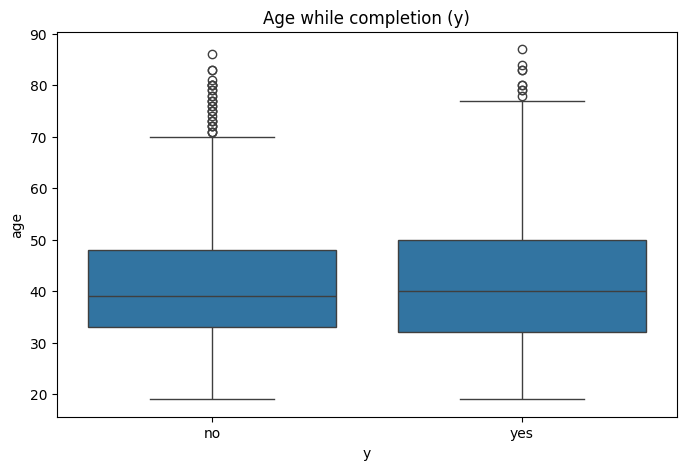

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="y", y="age")
plt.title("Age while completion (y)")
plt.show()

Yes-customers are slightly older on average, but the difference is not dramatic. Older customers (70+) tend to take out fixed-term deposits less frequently.

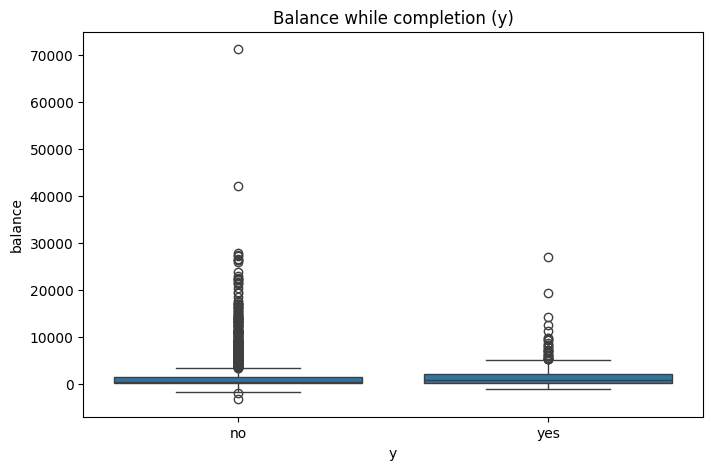

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="y", y="balance")
plt.title("Balance while completion (y)")
plt.show()

Customers who take out a fixed-term deposit tend to have slightly more money available, but the difference is not huge.
With No, the variation is very high → very heterogeneous customer group. Yes-customers seem to be less extreme in their balance.

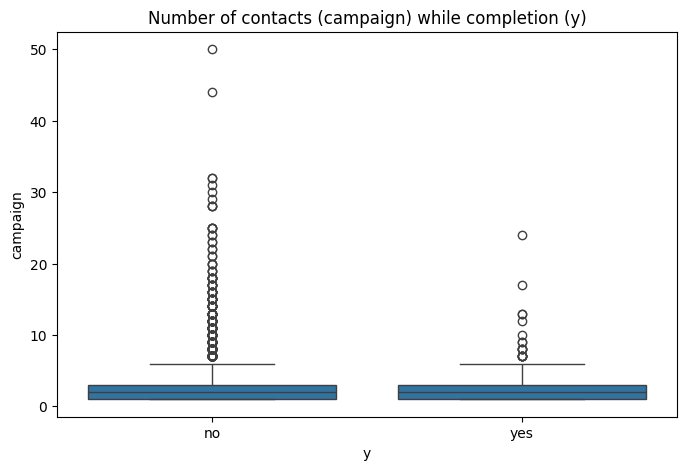

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="y", y="campaign")
plt.title("Number of contacts (campaign) while completion (y)")
plt.show()

The number of contacts to date is not a strong distinguishing factor. However, too much contact → customer is annoyed or uninterested → No. 
Yes happens early, often on the first or second contact.